<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science // Final Project</font></h1>

# <font color="SkyBlue">00. Introduction

<font color="RebeccaPurple">The purpose of modeling the German Credit Data is to predict which characteristics drive the debtor to be good or bad at default. Dataset is published at https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data). It consists 1000 rows with 20 columns.

# <font color="SkyBlue">01. Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
from six import StringIO
from sklearn import tree
import pydotplus
from time import time
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import joblib

# <font color="SkyBlue">02. Data Preparation

In [2]:
# Load dataset
loan = pd.read_csv("dataset/german_credit.csv", sep=",")
loan

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [3]:
# View list of columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

# <font color="SkyBlue">03. Data Preprocessing

In [4]:
# Separate dataset into train & test data
x = loan.drop(["default" ], axis=1)
y = loan["default"]

RANDOM_STATE = 9999

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)

In [5]:
# Select column names by data type

numeric_features = x.select_dtypes(include=["int64", "float64"]).columns
categorical_features = x.select_dtypes(include=["object"]).columns

# Numerical column transformer
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical column transformer
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Full column transformer
preprocess = ColumnTransformer([
    ('numerical', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features),
])

# <font color="SkyBlue">04. Logistic Regression

In [6]:
RANDOM_STATE = 9999

# Full model pipeline
model_lr = Pipeline(steps=[
    ('preprocess', preprocess),
    ('filter', VarianceThreshold()),
    ('model', LogisticRegression(random_state=RANDOM_STATE))
])

# Model fitting (this process include fitting the preprocess component)
model_lr.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'j

In [7]:
# Example of prediction using pipeline
model_lr.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

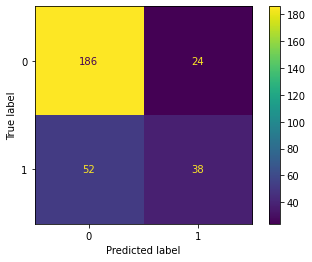

In [8]:
# Visualize confusion matrix
plot_confusion_matrix(model_lr, x_test, y_test)

In [9]:
# Display evaluation metrics
y_pred = model_lr.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       210
           1       0.61      0.42      0.50        90

    accuracy                           0.75       300
   macro avg       0.70      0.65      0.67       300
weighted avg       0.73      0.75      0.73       300



# <font color="SkyBlue">04. Decision Tree

In [10]:
# Fit a decision tree model
model_dt = Pipeline(steps=[
    ("preprocess", preprocess),
    ("filter", VarianceThreshold()),
    ("model", DecisionTreeClassifier(max_features=None, min_samples_leaf=0.05, random_state=RANDOM_STATE))
])

model_dt.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'j

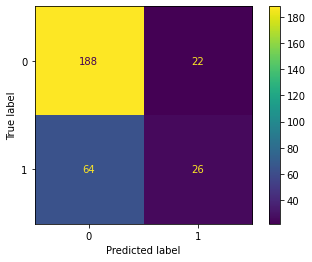

In [11]:
# Visualize confusion matrix
plot_confusion_matrix(model_dt, x_test, y_test)

In [12]:
# Display evaluation metrics
y_pred = model_dt.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.81       210
           1       0.54      0.29      0.38        90

    accuracy                           0.71       300
   macro avg       0.64      0.59      0.60       300
weighted avg       0.68      0.71      0.68       300



# <font color="SkyBlue">05. Random Forest
    with Hyperparameter Tuning

In [13]:
# Fit a random forest model
model_rf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("filter", VarianceThreshold()),
    ("model_rf", RandomForestClassifier(n_estimators=100, max_features="sqrt", min_samples_leaf=0.1, random_state=RANDOM_STATE))
])

model_rf.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unkn...
                                                  Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephon

In [14]:
# Define the parameter space
param_grid = {
    "model_rf__n_estimators": [150, 250],
    "model_rf__min_samples_leaf": [0.1, 1],
    "model_rf__max_features": ["sqrt", "log2"]
}

In [15]:
# Create the GridSearch
best_model_rf = GridSearchCV(model_rf, param_grid, cv=3)

In [16]:
# Run GridSearch (hyperparameter tuning)
best_model_rf.fit(x_train, y_train)
best_model_rf.cv_results_

{'mean_fit_time': array([0.18863861, 0.304456  , 0.22142108, 0.39970764, 0.21985348,
        0.3964227 , 0.32136146, 0.36361257]),
 'std_fit_time': array([0.01277811, 0.00510162, 0.0005383 , 0.04827142, 0.01957239,
        0.03175638, 0.06598087, 0.00622374]),
 'mean_score_time': array([0.01819404, 0.02729917, 0.02069227, 0.03669143, 0.02204418,
        0.03762197, 0.0298353 , 0.03084803]),
 'std_score_time': array([0.00113497, 0.00090859, 0.00042638, 0.00442523, 0.00260013,
        0.01078804, 0.0110768 , 0.00092108]),
 'param_model_rf__max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', 'sqrt', 'log2', 'log2', 'log2',
                    'log2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model_rf__min_samples_leaf': masked_array(data=[0.1, 0.1, 1, 1, 0.1, 0.1, 1, 1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype

In [17]:
best_model_rf.cv_results_["mean_test_score"]

array([0.69999878, 0.69999878, 0.76143575, 0.75713779, 0.69999878,
       0.69999878, 0.75570718, 0.75140922])

In [18]:
cv_result = pd.DataFrame({
    "rank": best_model_rf.cv_results_["rank_test_score"],
    "mean_score": best_model_rf.cv_results_["mean_test_score"],
    "std_score": best_model_rf.cv_results_["std_test_score"]
})
cv_result.head()

,rank,mean_score,std_score
0,5,0.699999,0.000605
1,5,0.699999,0.000605
2,1,0.761436,0.007858
3,2,0.757138,0.010808
4,5,0.699999,0.000605


In [19]:
cv_result = pd.concat([
    cv_result,
    pd.DataFrame(best_model_rf.cv_results_["params"])
], axis=1)
cv_result.head()

,rank,mean_score,std_score,model_rf__max_features,model_rf__min_samples_leaf,model_rf__n_estimators
0,5,0.699999,0.000605,sqrt,0.1,150
1,5,0.699999,0.000605,sqrt,0.1,250
2,1,0.761436,0.007858,sqrt,1.0,150
3,2,0.757138,0.010808,sqrt,1.0,250
4,5,0.699999,0.000605,log2,0.1,150


In [20]:
# Sort by mean_score in descending order to get best top models
cv_result.sort_values("mean_score", ascending=False)

,rank,mean_score,std_score,model_rf__max_features,model_rf__min_samples_leaf,model_rf__n_estimators
2,1,0.761436,0.007858,sqrt,1.0,150
3,2,0.757138,0.010808,sqrt,1.0,250
6,3,0.755707,0.012760,log2,1.0,150
7,4,0.751409,0.012982,log2,1.0,250
0,5,0.699999,0.000605,sqrt,0.1,150
1,5,0.699999,0.000605,sqrt,0.1,250
4,5,0.699999,0.000605,log2,0.1,150
5,5,0.699999,0.000605,log2,0.1,250


In [21]:
# Fit the best random forest model
model_rf1 = Pipeline(steps=[
    ("preprocess", preprocess),
    ("filter", VarianceThreshold()),
    ("model_rf1", RandomForestClassifier(n_estimators=150, max_features="sqrt", min_samples_leaf=1, random_state=RANDOM_STATE))
])

model_rf1.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unkn...
                                                  Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephon

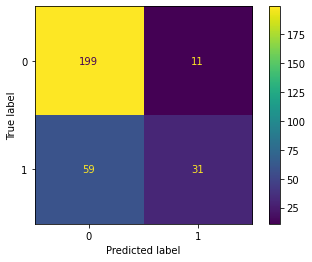

In [22]:
# Visualize confusion matrix
plot_confusion_matrix(model_rf1, x_test, y_test)

In [23]:
# Display evaluation metrics
y_pred = model_rf1.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       210
           1       0.74      0.34      0.47        90

    accuracy                           0.77       300
   macro avg       0.75      0.65      0.66       300
weighted avg       0.76      0.77      0.74       300



<font color="DarkViolet">**Notes:**
    
The best model is the one with Random Forest, because it has stable accuracy between training and testing, along with the high f1-score that points out that the model is robust enough to predict whether the client will subscribe to a time-deposit or not.

# <font color="SkyBlue">06. Final Model

In [24]:
# See the content of object features
loan["account_check_status"].value_counts()
loan["credit_history"].value_counts()
loan["purpose"].value_counts()
loan["savings"].value_counts()
loan["present_emp_since"].value_counts()
loan["personal_status_sex"].value_counts()
loan["other_debtors"].value_counts()
loan["property"].value_counts()
loan["other_installment_plans"].value_counts()
loan["housing"].value_counts()
loan["job"].value_counts()
loan["telephone"].value_counts()
loan["foreign_worker"].value_counts()

yes    963
no      37
Name: foreign_worker, dtype: int64

In [25]:
# Convert object features into numeric
loan["account_check_status"] = loan["account_check_status"].replace({"< 0 DM": 0, "0 <= ... < 200 DM": 1, ">= 200 DM / salary assignments for at least 1 year": 2, "no checking account": 3})
loan["credit_history"] = loan["credit_history"].replace({"existing credits paid back duly till now": 0, "critical account/ other credits existing (not at this bank)": 1, "delay in paying off in the past": 2, "all credits at this bank paid back duly": 3, "no credits taken/ all credits paid back duly": 4})
loan["purpose"] = loan["purpose"].replace({"domestic appliances": 0, "car (new)": 1, "radio/television": 2, "car (used)": 3, "business": 4, "(vacation - does not exist?)": 5, "education": 6, "repairs": 7, "furniture/equipment": 8, "retraining": 9})
loan["savings"] = loan["savings"].replace({"... < 100 DM": 0, "unknown/ no savings account": 1, "100 <= ... < 500 DM": 2, "500 <= ... < 1000 DM ": 3, ".. >= 1000 DM ": 4})
loan["present_emp_since"] = loan["present_emp_since"].replace({"1 <= ... < 4 years": 0, ".. >= 7 years": 1, "4 <= ... < 7 years": 2, "... < 1 year ": 3, "unemployed": 4})
loan["personal_status_sex"] = loan["personal_status_sex"].replace({"male : single": 0, "female : divorced/separated/married": 1, "male : married/widowed": 2, "male : divorced/separated": 3})
loan["other_debtors"] = loan["other_debtors"].replace({"none": 0, "guarantor": 1, "co-applicant": 2})
loan["property"] = loan["property"].replace({"if not A121/A122 : car or other, not in attribute 6": 0, "real estate": 1, "if not A121 : building society savings agreement/ life insurance": 2, "unknown / no property": 3})
loan["other_installment_plans"] = loan["other_installment_plans"].replace({"none": 0, "bank": 1, "stores": 2})
loan["housing"] = loan["housing"].replace({"own": 0, "rent": 1, "for free": 2})
loan["job"] = loan["job"].replace({"skilled employee / official": 0, "unskilled - resident": 1, "management/ self-employed/ highly qualified employee/ officer": 2, "unemployed/ unskilled - non-resident": 3})
loan["telephone"] = np.where(loan["telephone"] == "none", 0, 1)
loan["foreign_worker"] = loan["foreign_worker"].replace({"yes": 0, "no": 1})

loan

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,0,6,1,0,1169,1,1,4,0,...,4,1,67,0,0,2,0,1,1,0
1,1,1,48,0,0,5951,0,0,2,1,...,2,1,22,0,0,1,0,1,0,0
2,0,3,12,1,5,2096,0,2,2,0,...,3,1,49,0,0,1,1,2,0,0
3,0,0,42,0,2,7882,0,2,2,0,...,4,2,45,0,2,1,0,2,0,0
4,1,0,24,2,1,4870,0,0,3,0,...,4,3,53,0,2,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,0,2,1736,0,2,3,1,...,4,1,31,0,0,1,1,1,0,0
996,0,0,30,0,3,3857,0,0,4,3,...,4,2,40,0,0,1,2,1,1,0
997,0,3,12,0,0,804,0,1,4,0,...,4,0,38,0,0,1,0,1,0,0
998,1,0,45,0,0,1845,0,0,4,0,...,4,3,23,0,2,1,0,1,1,0


In [26]:
# Define feature column names
feat_cols = ["default", "duration_in_month", "credit_history", "purpose", "credit_amount", "savings", "present_emp_since", "installment_as_income_perc", "personal_status_sex", "other_debtors", "present_res_since", "property", "age", "other_installment_plans", "housing", "credits_this_bank", "job", "people_under_maintenance", "telephone", "foreign_worker"]

In [27]:
# Separate dataset into train & test data
x = loan.drop(["default"], axis=1)
y = loan["default"]

RANDOM_STATE = 9999

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)

In [28]:
# See the feature importance of chosen model (Random Forest)
model_final = RandomForestClassifier()
model_final.fit(x_train, y_train)
feat_importance = pd.Series(model_final.feature_importances_, index=feat_cols).sort_values(ascending=False)
feat_importance

credit_amount                 0.136906
default                       0.113993
age                           0.100813
duration_in_month             0.094419
credit_history                0.064526
purpose                       0.061685
present_emp_since             0.049600
property                      0.045234
savings                       0.043086
present_res_since             0.042315
installment_as_income_perc    0.041827
personal_status_sex           0.039382
job                           0.032443
other_installment_plans       0.028321
housing                       0.023699
credits_this_bank             0.022598
telephone                     0.020125
other_debtors                 0.019970
people_under_maintenance      0.014448
foreign_worker                0.004611
dtype: float64

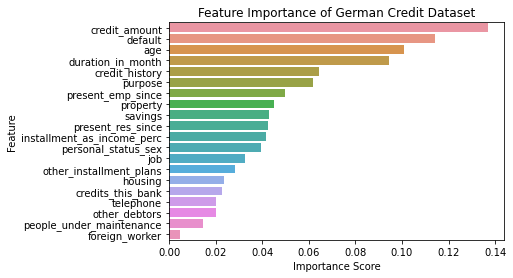

In [29]:
# Plot the feature importance
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance of German Credit Dataset")
plt.show()

In [30]:
# Save the model
joblib.dump(model_final, "h8-deployment/data/model_final.joblib")

['h8-deployment/data/model_final.joblib']